In [1]:
import networkx as nx
import freeman as fm

In [2]:
g = fm.load('marvel.gml')

In [3]:
g.label_nodes('name')
g.set_all_nodes(size=15, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))

In [4]:
g.draw()

In [5]:
dc = nx.degree_centrality(g)

In [6]:
ec = nx.eigenvector_centrality(g, max_iter=10000)

In [7]:
max(dc.values())

0.8806818181818182

In [8]:
names = []
for i in g.nodes:
    names.append(g.nodes[i]['name'])

In [9]:
import pandas as pd
data = pd.DataFrame({
    'id' : [i for i in g.nodes],
    'name': list(names),
    'degree': dc.values(),
    'eigenvector': ec.values()
})

In [10]:
data

,id,name,degree,eigenvector
0,1009220,Captain America,0.795455,0.117841
1,1010740,Winter Soldier,0.477273,0.082953
2,1009471,Nick Fury,0.687500,0.109005
3,1009515,Punisher,0.585227,0.097425
4,1009535,Red Skull,0.482955,0.084815
...,...,...,...,...
172,1011092,Leech,0.130682,0.026420
173,1011071,Demogoblin,0.045455,0.005701
174,1009248,Fabian Cortez,0.068182,0.013753
175,1011073,Bloodaxe,0.034091,0.005819


In [11]:
data[data['eigenvector'] == max(ec.values())]

,id,name,degree,eigenvector
9,1009718,Wolverine,0.880682,0.124279


In [12]:
data[data['degree'] == max(dc.values())]

,id,name,degree,eigenvector
9,1009718,Wolverine,0.880682,0.124279
10,1009610,Spider-Man,0.880682,0.121073


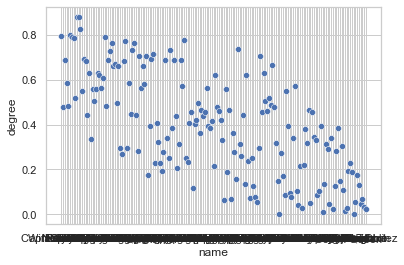

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(y='degree', x='name', data=data)

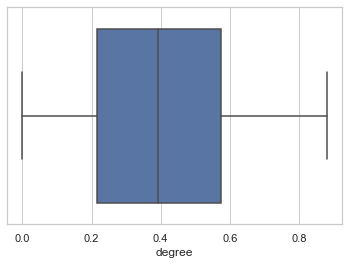

In [14]:
ax = sns.boxplot(x="degree", data=data)

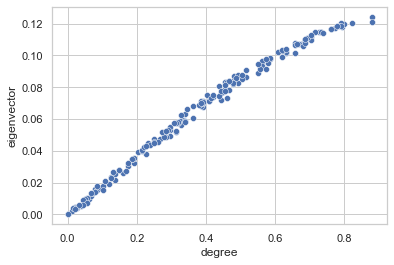

In [15]:
sns.scatterplot(data=data, x='degree', y='eigenvector');

In [16]:
values = data['name'].unique()

# Cria uma coluna para todos os valores, menos um.
# A última coluna é implícita pelas outras, então
# seria redundante criá-la.
for value in values[:-1]:
    data[value] = [1 if v == value else 0 for v in data['name']]

In [17]:
data

,id,name,degree,eigenvector,Captain America,Winter Soldier,Nick Fury,Punisher,Red Skull,Beast,...,Goblin Queen,Callisto,Agent Zero,Toxin,Shriek,Arclight,Leech,Demogoblin,Fabian Cortez,Bloodaxe
0,1009220,Captain America,0.795455,0.117841,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1010740,Winter Soldier,0.477273,0.082953,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1009471,Nick Fury,0.687500,0.109005,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1009515,Punisher,0.585227,0.097425,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1009535,Red Skull,0.482955,0.084815,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1011092,Leech,0.130682,0.026420,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
173,1011071,Demogoblin,0.045455,0.005701,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
174,1009248,Fabian Cortez,0.068182,0.013753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
175,1011073,Bloodaxe,0.034091,0.005819,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
import statsmodels.api as sm
model = sm.OLS(data['degree'], data[[v for v in values[:-1]]])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 degree   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              409.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                      0.0394
Time:                        18:56:43   Log-Likelihood:                          876.74
No. Observations:                 177   AIC:                                     -1401.
Df Residuals:                       1   BIC:                                     -842.5
Df Model:                         176                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Captain America       0.7955      0.023     35.000      0.018       0.507       1.084
Winter Soldier        0.4773      0.023     21.000      0.030       0.188       0.766
Nick Fury             0.6875      0.023     30.250      0.021       0.399       0.976
Punisher              0.5852      0.023     25.750      0.025       0.296       0.874
Red Skull             0.4830      0.023     21.250      0.030       0.194       0.772
Beast                 0.8011      0.023     35.250      0.018       0.512       1.090
Colossus              0.7898      0.023     34.750      0.018       0.501       1.079
Cyclops               0.7841      0.023     34.500      0.018       0.495       1.073
Emma Frost            0.5170      0.023     22.750      0.028       0.228       0.806
Wolverine             0.8807      0.023     38.750      0.016       0.592       1.169
Spider-Man            0.8807      0.023     38.750      0.016       0.592       1.169
Iron Man              0.8239      0.023     36.250      0.018       0.535       1.113
Deadpool              0.5511      0.023     24.250      0.026       0.262       0.840
Gambit                0.6932      0.023     30.500      0.021       0.404       0.982
Rogue                 0.6818      0.023     30.000      0.021       0.393       0.971
Luke Cage             0.4432      0.023     19.500      0.033       0.154       0.732
Domino                0.6307      0.023     27.750      0.023       0.342       0.919
Lady Deathstrike      0.3352      0.023     14.750      0.043       0.046       0.624
Sabretooth            0.5568      0.023     24.500      0.026       0.268       0.846
Warpath               0.5057      0.023     22.250      0.029       0.217       0.794
Galactus              0.5568      0.023     24.500      0.026       0.268       0.846
Silver Surfer         0.6307      0.023     27.750      0.023       0.342       0.919
Banshee               0.6193      0.023     27.250      0.023       0.331       0.908
Dazzler               0.5625      0.023     24.750      0.026       0.274       0.851
Havok                 0.6080      0.023     26.750      0.024       0.319       0.897
Hulk                  0.7898      0.023     34.750      0.018       0.501       1.079
Machine Man           0.4830      0.023     21.250      0.030       0.194       0.772
Psylocke              0.6875      0.023     30.250      0.021       0.399       0.976
Nightcrawler          0.7273      0.023     32.000      0.020       0.438       1.016
Storm                 0.7614      0.023     33.500      0.019       0.473       1.050
Jean Grey             0.6591      0.023     29.000      0.022       0.370       0.948
Doctor Doom           0.6705      0.023     29.500      0.02

In [19]:
import statsmodels.api as sm
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            eigenvector   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              584.7
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                      0.0329
Time:                        18:57:28   Log-Likelihood:                          1228.4
No. Observations:                 177   AIC:                                     -2105.
Df Residuals:                       1   BIC:                                     -1546.
Df Model:                         176                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Captain America       0.1178      0.003     37.801      0.017       0.078       0.157
Winter Soldier        0.0830      0.003     26.610      0.024       0.043       0.123
Nick Fury             0.1090      0.003     34.967      0.018       0.069       0.149
Punisher              0.0974      0.003     31.252      0.020       0.058       0.137
Red Skull             0.0848      0.003     27.207      0.023       0.045       0.124
Beast                 0.1197      0.003     38.411      0.017       0.080       0.159
Colossus              0.1202      0.003     38.544      0.017       0.081       0.160
Cyclops               0.1185      0.003     38.009      0.017       0.079       0.158
Emma Frost            0.0861      0.003     27.627      0.023       0.047       0.126
Wolverine             0.1243      0.003     39.867      0.016       0.085       0.164
Spider-Man            0.1211      0.003     38.838      0.016       0.081       0.161
Iron Man              0.1205      0.003     38.669      0.016       0.081       0.160
Deadpool              0.0887      0.003     28.452      0.022       0.049       0.128
Gambit                0.1106      0.003     35.463      0.018       0.071       0.150
Rogue                 0.1077      0.003     34.545      0.018       0.068       0.147
Luke Cage             0.0721      0.003     23.132      0.028       0.033       0.112
Domino                0.1015      0.003     32.558      0.020       0.062       0.141
Lady Deathstrike      0.0592      0.003     19.003      0.033       0.020       0.099
Sabretooth            0.0931      0.003     29.870      0.021       0.054       0.133
Warpath               0.0854      0.003     27.400      0.023       0.046       0.125
Galactus              0.0939      0.003     30.118      0.021       0.054       0.133
Silver Surfer         0.1019      0.003     32.686      0.019       0.062       0.142
Banshee               0.1030      0.003     33.048      0.019       0.063       0.143
Dazzler               0.0947      0.003     30.393      0.021       0.055       0.134
Havok                 0.1020      0.003     32.716      0.019       0.062       0.142
Hulk                  0.1184      0.003     37.984      0.017       0.079       0.158
Machine Man           0.0872      0.003     27.962      0.023       0.048       0.127
Psylocke              0.1096      0.003     35.174      0.018       0.070       0.149
Nightcrawler          0.1145      0.003     36.736      0.017       0.075       0.154
Storm                 0.1166      0.003     37.401      0.017       0.077       0.156
Jean Grey             0.1077      0.003     34.536      0.018       0.068       0.147
Doctor Doom           0.1070      0.003     34.330      0.01